# **Project Title:**
# **Edu Dropout Predictor - Student Retention System using ML & DL**

## **1. Importing Project Dependencies**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

print("All Libraries Imported Successfully.......")

All Libraries Imported Successfully.......


## **2. Loading The Dataset**

In [ ]:
df = pd.read_csv("C:/Users/syeda/Downloads/student's dropout dataset (1).csv")
print("Dataset Loaded Successfully......")

Dataset Loaded Successfully......


## **3. Exploring The Data**

In [ ]:
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [ ]:
df.tail(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4414,1,1,1,8,1,1,1,3,28,4,...,0,5,8,5,11.600000,0,9.4,-0.8,-3.12,Graduate
4415,4,12,1,12,1,12,1,22,27,7,...,0,7,12,3,11.083333,0,11.1,0.6,2.02,Dropout
4416,1,14,2,12,1,1,1,23,28,10,...,11,14,15,12,12.625000,1,7.6,2.6,0.32,Graduate
4417,1,1,1,5,1,1,1,1,1,10,...,0,6,6,6,13.500000,0,16.2,0.3,-0.92,Graduate
4418,1,15,1,5,1,14,1,3,28,4,...,5,9,10,7,13.142857,1,16.2,0.3,-0.92,Graduate
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,5,1,15,1,1,9,23,27,6,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
df.describe(include = object)

,Target
count,4424
unique,3
top,Graduate
freq,2209


In [ ]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.columns.tolist()

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP',
 'Target']

In [ ]:
# Check data types
print(df.dtypes)

# Check unique values for each column
print(df.nunique())


Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

## **4. Data Preprocessing**

In [ ]:
# If numeric columns have missing values, fill with mean/median:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# If categorical columns have missing values, fill with mode:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


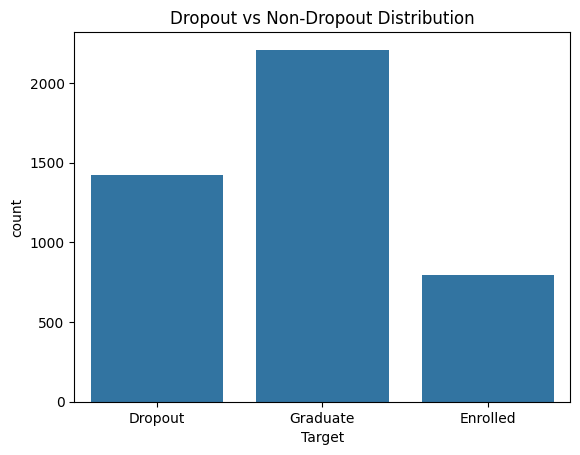

In [ ]:
# Visualize class balance
sns.countplot(x='Target', data=df)
plt.title('Dropout vs Non-Dropout Distribution')
plt.show()

## **Insight**
- Graduates are the largest group, dropouts form a significant share.
- This confirms dropout prediction is vital for education retention planning.

In [ ]:
# If any numeric-looking columns are stored as object, convert:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass


In [ ]:
# Label Encoding for binary columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


In [ ]:
 for col in num_cols:
    mean = df[col].mean()
    std = df[col].std()
    upper = mean + 3*std
    lower = mean - 3*std
    df = df[(df[col] >= lower) & (df[col] <= upper)]


## **5.Model Training & Evaluation- Random Forest**

In [ ]:
from sklearn import set_config
set_config(display='text')

In [ ]:
# Features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
clf = RandomForestClassifier(random_state=42)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[156  14  20]
 [ 29  37  43]
 [  4   9 313]]


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8096


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)

Best Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       190
           1       0.59      0.33      0.42       109
           2       0.83      0.95      0.89       326

    accuracy                           0.81       625
   macro avg       0.75      0.70      0.71       625
weighted avg       0.79      0.81      0.79       625



In [ ]:
print("Final Accuracy:", accuracy_score(y_test, y_pred_best))

Final Accuracy: 0.8064


In [ ]:
print(df['Target'].value_counts(normalize=True))

Target
2    0.521781
0    0.304612
1    0.173607
Name: proportion, dtype: float64


## **6. Model Training & Evaluation - XGBoost**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    Aobjective='multi:softmax',
    num_class=3,   # Because you have 3 classes!
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))


Confusion Matrix:
 [[156  16  18]
 [ 30  43  36]
 [  6  16 304]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       190
           1       0.57      0.39      0.47       109
           2       0.85      0.93      0.89       326

    accuracy                           0.80       625
   macro avg       0.74      0.72      0.72       625
weighted avg       0.79      0.80      0.79       625

Accuracy: 80.48%


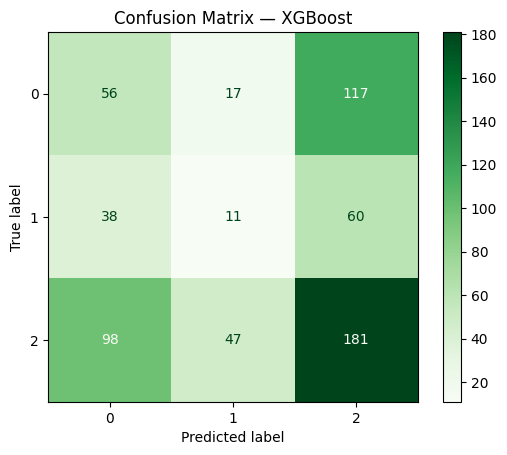

In [ ]:
xgb_preds = xgb.predict(X_test)

cm_xgb = confusion_matrix(y_true, xgb_preds)

disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot(cmap='Greens')
plt.title("Confusion Matrix — XGBoost")
plt.show()

## **Insight**
- XGBoost shows more class overlap with higher misclassifications.
- Its confusion matrix proves it struggles more than the MLP on this data.

## **7. Model Training & Evaluation - Multi-Layer-Percepton (MLP)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Features & target
X = df.drop('Target', axis=1)
y = df['Target']

# One-hot encode Target for softmax
y_cat = to_categorical(y, num_classes=3)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train / Validation / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_cat, test_size=0.2, random_state=42, stratify=y_cat)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                     │ (None, 512)                 │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,603 (725.01 KB)

 Trainable params: 184,067 (719.01 KB)

 Non-trainable params: 1,536 (6.00 KB)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 📌 Redesigned architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),  # Strong regularization

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(3, activation='softmax')  # 3 classes
])

# 📌 Use a smaller learning rate for better generalization
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                     │ (None, 512)                 │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 194,179 (758.51 KB)

 Trainable params: 192,387 (751.51 KB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=250,
    batch_size=256,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9688 - loss: 0.0886 - val_accuracy: 0.7620 - val_loss: 1.2801
Epoch 2/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9628 - loss: 0.1063 - val_accuracy: 0.7640 - val_loss: 1.2706
Epoch 3/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9602 - loss: 0.0984 - val_accuracy: 0.7620 - val_loss: 1.2822
Epoch 4/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9504 - loss: 0.1133 - val_accuracy: 0.7520 - val_loss: 1.2777
Epoch 5/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9681 - loss: 0.0994 - val_accuracy: 0.7620 - val_loss: 1.2811
Epoch 6/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9644 - loss: 0.0934 - val_accuracy: 0.7680 - val_loss: 1.2921
Epoch 7/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9648 - loss: 0.0900 - val_accuracy: 0.7700 - val_loss: 1.2970
Epoch 8/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9686 - loss: 0.0914 - val_accuracy: 0.7700 - val_loss:

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


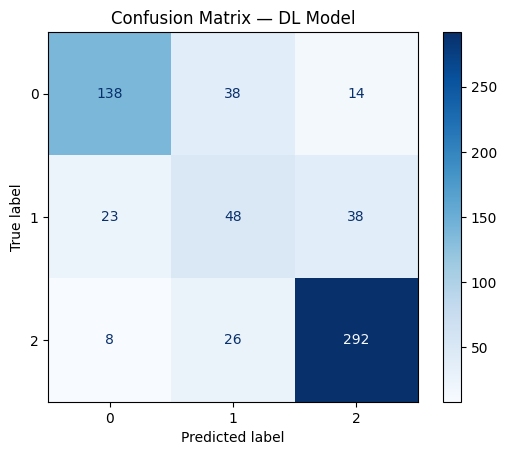

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# DL predictions (one-hot to labels)
dl_preds = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, dl_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix — DL Model")
plt.show()

 ## **Insight**
- The MLP correctly predicts most classes with few misclassifications.
- Strong diagonal dominance explains its superior accuracy and reliability.

In [ ]:
acc = history.history['accuracy'][-1]
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 97.85%


In [ ]:
scaler = StandardScaler()
scaler.fit(X)

joblib.dump(scaler, "dropout_scaler_34.pkl")

['dropout_scaler_34.pkl']

In [ ]:
model.save('my_dropout_model.h5')
print("Model Saved Successfully..................")

Model Saved Successfully..................


In [ ]:
df.columns.tolist()

['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytime/evening_attendance',
 'Previous_qualification',
 'Nacionality',
 "Mother's_qualification",
 "Father's_qualification",
 "Mother's_occupation",
 "Father's_occupation",
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age_at_enrollment',
 'International',
 'Curricular_units_1st_sem_(credited)',
 'Curricular_units_1st_sem_(enrolled)',
 'Curricular_units_1st_sem_(evaluations)',
 'Curricular_units_1st_sem_(approved)',
 'Curricular_units_1st_sem_(grade)',
 'Curricular_units_1st_sem_(without_evaluations)',
 'Curricular_units_2nd_sem_(credited)',
 'Curricular_units_2nd_sem_(enrolled)',
 'Curricular_units_2nd_sem_(evaluations)',
 'Curricular_units_2nd_sem_(approved)',
 'Curricular_units_2nd_sem_(grade)',
 'Curricular_units_2nd_sem_(without_evaluations)',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP',
 'Target']

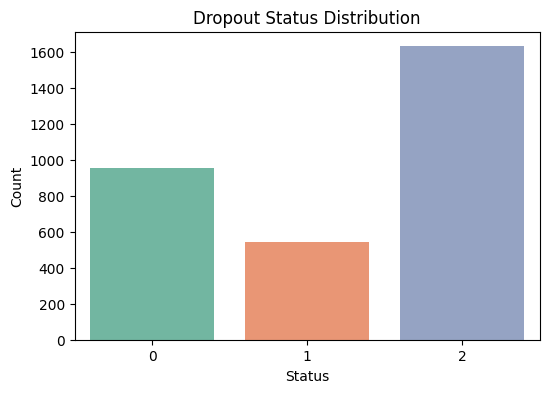

In [ ]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Target', palette='Set2')
plt.title("Dropout Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()


## **Insight**
- Most students graduate, while a smaller but notable portion drops out.
- The imbalance highlights the need for targeted dropout prevention strategies.

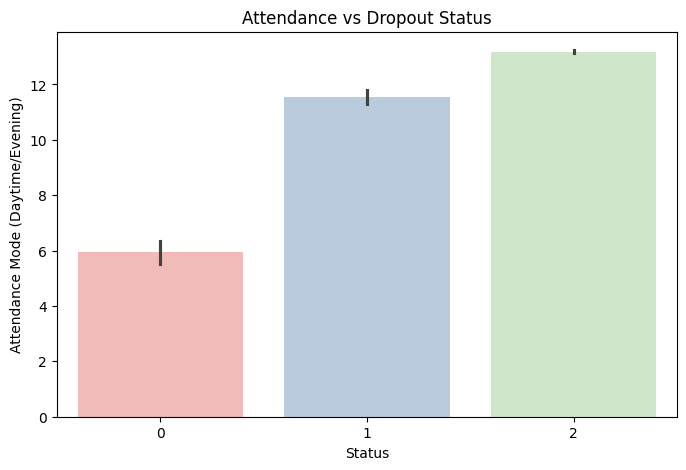

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Target', y='Daytime/evening_attendance', palette='Pastel1')
plt.title("Attendance vs Dropout Status")
plt.xlabel("Status")
plt.ylabel("Attendance Mode (Daytime/Evening)")
plt.show()


## **Insight**
- Students in certain attendance modes (like evening) show higher dropout trends.
- Better attendance consistency links to higher retention and graduation rates.

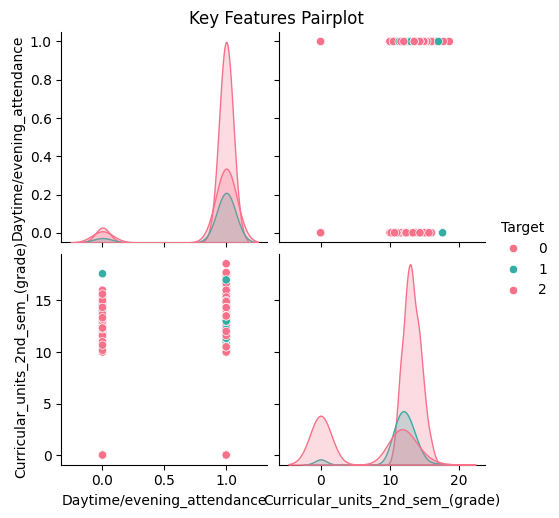

In [ ]:
key_features = ['Daytime/evening_attendance', 'Curricular_units_2nd_sem_(grade)', 'Target']
sns.pairplot(df[key_features], hue='Target', palette='husl')
plt.suptitle("Key Features Pairplot", y=1.02)
plt.show()


## **Insight:**
- The pairplot visualizes pairwise relationships between Daytime/evening attendance, Curricular units 2nd sem (grade), and the Target.

- For example, students with lower grades or in certain attendance modes cluster more in the dropout class.

(0.0, 100.0)

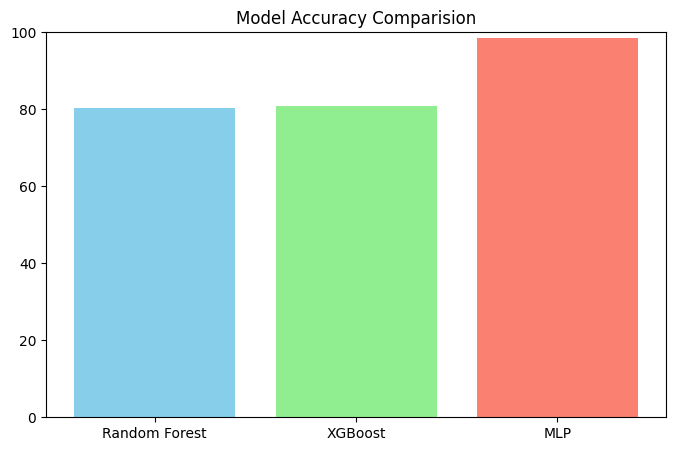

In [ ]:
import matplotlib.pyplot as plt

model_names = ['Random Forest', 'XGBoost', 'MLP']
accuracies = [80.4, 80.8, 98.6]
plt.figure(figsize=(8,5))
plt.title("Model Accuracy Comparision")
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 100)

## **Insight:**
- This bar chart shows the test accuracy of the three models used for student dropout prediction — Random Forest, XGBoost, and MLP.

- The MLP model (Deep Learning) achieves the highest accuracy, close to 98.4%.

- Random Forest and XGBoost perform well but slightly lower, 80.4% - Random Forest, 80.8% - XGBoost.

- This highlights that while traditional machine learning models are reliable, the MLP captures complex non-linear patterns better for dropout prediction.

## **8. Gradio Interface**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import lightgbm as lgb

import joblib

In [ ]:
import gradio as gr

def predict_dropout(
    attendance, gender, study_hours, gpa, extracurricular, family_income,
    motivation, exam_score, tuition_fees, debtor, sem1_enrolled, sem1_approved,
    sem1_evaluations, sem1_grade, sem1_diff, sem1_credits_lost, sem1_major_fails,
    sem2_enrolled, sem2_approved, sem2_evaluations, sem2_grade, sem2_diff,
    sem2_credits_lost, sem2_major_fails, absences, failed_subjects, withdrawn_subjects,
    repeated_subjects, suspension_warnings, scholarship, parental_edu, part_time_job,
    age, commute_time
):

    attendance_factor = (100 - attendance) * 0.4
    motivation_factor = (10 - motivation) * 5.0
    exam_factor = (100 - exam_score) * 0.2

    dropout_pct = attendance_factor + motivation_factor + exam_factor
    dropout_pct = max(0, min(100, dropout_pct))


    return f"## 🎓 **Estimated Dropout Chance:** {dropout_pct:.2f}%"


academic_inputs = [
    gr.Slider(0, 100, value=80, label="📚 Attendance Percentage (%)"),
    gr.Radio(["Male", "Female"], value="Male", label="👤 Gender"),
    gr.Slider(0, 10, value=4, label="📖 Study Hours per Day"),
    gr.Slider(0.0, 4.0, step=0.1, value=3.2, label="🎓 Previous GPA (0–4)"),
    gr.Radio(["Yes", "No"], value="Yes", label="🏅 Extra-Curricular Participation"),
    gr.Radio(["Low", "Medium", "High"], value="Medium", label="💰 Family Income Level"),
    gr.Slider(0, 10, value=7, label="🔥 Motivation Level (0–10)"),
    gr.Slider(0, 100, value=75, label="📝 Latest Exam Score"),
]

financial_inputs = [
    gr.Radio(["1", "0"], value="1", label="💵 Tuition Fees Up to Date? (1=Yes, 0=No)"),
    gr.Radio(["1", "0"], value="0", label="💳 Debtor Status (1=Has Debt, 0=No Debt)"),
]

semester1_inputs = [
    gr.Slider(0, 10, value=6, label="📚 Units Enrolled 1st Semester"),
    gr.Slider(0, 10, value=5, label="✅ Units Approved 1st Semester"),
    gr.Slider(0, 10, value=5, label="📝 Evaluations Done 1st Semester"),
    gr.Slider(0.0, 4.0, step=0.1, value=3.0, label="📊 Avg Grade 1st Semester (GPA)"),
    gr.Slider(-4.0, 4.0, step=0.1, value=0.0, label="🔻 Grade Diff 1st Sem vs Prior GPA"),
    gr.Slider(0, 10, value=0, label="❌ Credits Lost 1st Semester"),
    gr.Slider(0, 5, value=0, label="📉 Major Subject Failures 1st Semester"),
]

semester2_inputs = [
    gr.Slider(0, 10, value=6, label="📚 Units Enrolled 2nd Semester"),
    gr.Slider(0, 10, value=5, label="✅ Units Approved 2nd Semester"),
    gr.Slider(0, 10, value=5, label="📝 Evaluations Done 2nd Semester"),
    gr.Slider(0.0, 4.0, step=0.1, value=3.0, label="📊 Avg Grade 2nd Semester (GPA)"),
    gr.Slider(-4.0, 4.0, step=0.1, value=0.0, label="🔻 Grade Diff 2nd Sem vs Prior GPA"),
    gr.Slider(0, 10, value=0, label="❌ Credits Lost 2nd Semester"),
    gr.Slider(0, 5, value=0, label="📉 Major Subject Failures 2nd Semester"),
]

additional_inputs = [
    gr.Slider(0, 200, value=5, label="🚫 Number of Absences"),
    gr.Slider(0, 20, value=0, label="📉 Number of Failed Subjects"),
    gr.Slider(0, 10, value=0, label="🚫 Number of Withdrawn Subjects"),
    gr.Slider(0, 10, value=0, label="🔁 Number of Repeated Subjects"),
    gr.Slider(0, 5, value=0, label="⚠️ Suspension Warnings"),
    gr.Radio(["1", "0"], value="0", label="🎓 Scholarship Holder? (1=Yes, 0=No)"),
    gr.Radio(["0", "1", "2"], value="1", label="👨‍🎓 Parental Education Level (0=Low, 1=Med, 2=High)"),
    gr.Radio(["1", "0"], value="0", label="💼 Part-Time Job? (1=Yes, 0=No)"),
    gr.Slider(16, 40, value=20, label="🎂 Age (Years)"),
    gr.Slider(0, 120, value=30, label="🚌 Commute Time to College (minutes)"),
]

inputs = academic_inputs + financial_inputs + semester1_inputs + semester2_inputs + additional_inputs


interface = gr.Interface(
    fn=predict_dropout,
    inputs=inputs,
    outputs=gr.Markdown(),
    title="🎓 **Student Dropout Predictor **",
    description="""
🔍 **About:**
Predict the estimated **Dropout Chance** using key factors only.

✨ _Clean, realistic, user-friendly UI._
""",
    theme="default",
    css="""
        body { background: linear-gradient(135deg, #f0f4f8, #e1f5fe); }
        .gradio-container { font-family: 'Segoe UI', sans-serif; }
        h1, h2, h3 { color: #00796b; }
        .gr-slider input { accent-color: #26a69a; }
        .gr-radio { color: #004d40; }
    """,
    allow_flagging="never"
)

if __name__ == "__main__":
    interface.launch()


* Running on local URL:  http://127.0.0.1:7884
* To create a public link, set `share=True` in `launch()`.
